In [63]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error


Missing values after handling:
Transaction_ID      0
Customer_Age        0
Product_Category    0
Sales_Amount        0
Payment_Method      0
Discount_Applied    0
dtype: int64

Summary statistics for numerical columns:
       Customer_Age  Sales_Amount  Discount_Applied
count    110.000000    110.000000        110.000000
mean      40.836364    514.597981          5.681818
std       13.584785    277.814163          5.765974
min       18.000000     19.110000          0.000000
25%       31.000000    267.157500          0.000000
50%       40.500000    514.597981          5.000000
75%       52.750000    712.792500         10.000000
max       64.000000    985.790000         15.000000


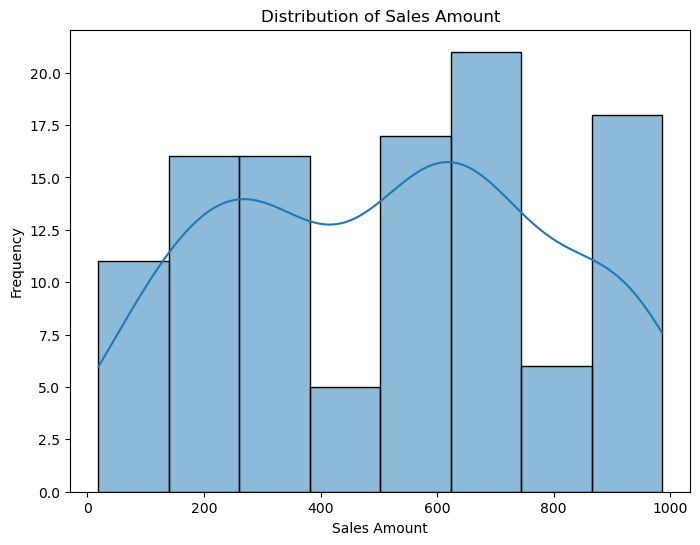

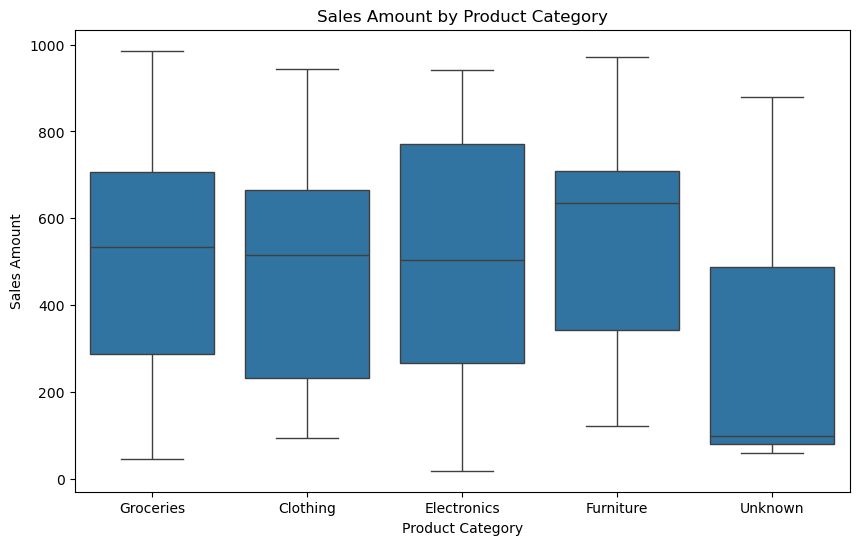

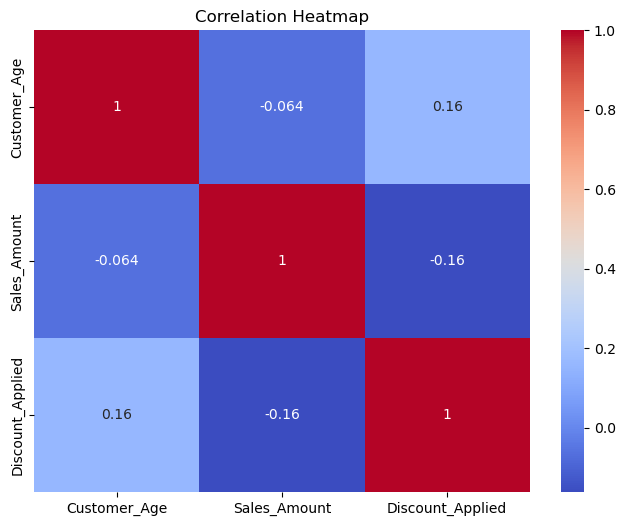

In [65]:
# Handle missing values
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].median())  # Fill missing age with median
df['Sales_Amount'] = df['Sales_Amount'].fillna(df['Sales_Amount'].mean())  # Fill missing sales amount with mean
df['Payment_Method'] = df['Payment_Method'].fillna(df['Payment_Method'].mode()[0])  # Fill missing payment method with mode
df['Discount_Applied'] = df['Discount_Applied'].fillna(0)  # Fill missing discount with 0 (assuming no discount)

# Verify missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())

# Basic statistical analysis
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Visualizations
# Distribution of Sales_Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales_Amount'], kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Sales_Amount by Product_Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Category', y='Sales_Amount', data=df)
plt.title('Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.show()

# Correlation heatmap (only for numeric columns)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [66]:
# Handle missing values
df['Customer_Age'] = df['Customer_Age'].fillna(df['Customer_Age'].median())  # Fill missing age with median
df['Sales_Amount'] = df['Sales_Amount'].fillna(df['Sales_Amount'].mean())  # Fill missing sales amount with mean
df['Payment_Method'] = df['Payment_Method'].fillna(df['Payment_Method'].mode()[0])  # Fill missing payment method with mode
df['Discount_Applied'] = df['Discount_Applied'].fillna(0)  # Fill missing discount with 0 (assuming no discount)

# Verify missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())

# Basic statistical analysis
print("\nSummary statistics for numerical columns:")
print(df.describe())


Missing values after handling:
Transaction_ID      0
Customer_Age        0
Product_Category    0
Sales_Amount        0
Payment_Method      0
Discount_Applied    0
dtype: int64

Summary statistics for numerical columns:
       Customer_Age  Sales_Amount  Discount_Applied
count    110.000000    110.000000        110.000000
mean      40.836364    514.597981          5.681818
std       13.584785    277.814163          5.765974
min       18.000000     19.110000          0.000000
25%       31.000000    267.157500          0.000000
50%       40.500000    514.597981          5.000000
75%       52.750000    712.792500         10.000000
max       64.000000    985.790000         15.000000


In [68]:

# Define features (X) and target (y)
X = df.drop(['Transaction_ID', 'Sales_Amount'], axis=1)  # Exclude non-numeric and target columns
y = df['Sales_Amount']

# Encode categorical variables
categorical_features = ['Product_Category', 'Payment_Method']
one_hot = OneHotEncoder(drop='first')  # Drop first column to avoid multicollinearity
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)

# Transform the data
X_transformed = transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")



Model Evaluation:
R-squared: 0.1570816330762641
Mean Squared Error (MSE): 75235.43005855358
